In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
insurance_data = pd.read_csv('carInsurance_train.csv')
insurance_test = pd.read_csv('carInsurance_test.csv')

In [3]:
insurance_data.shape

(4000, 19)

In [4]:
insurance_test.shape

(1000, 19)

In [5]:
insurance_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


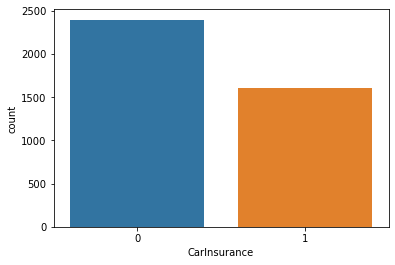

In [6]:
sns.countplot('CarInsurance',data=insurance_data)

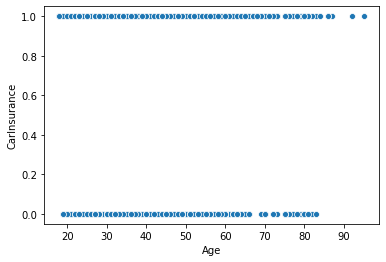

In [7]:
sns.scatterplot('Age','CarInsurance',data=insurance_data)

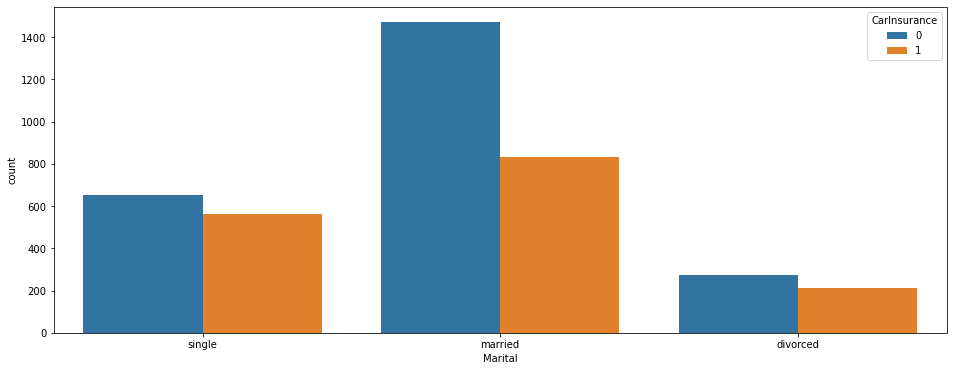

In [8]:
plt.figure(figsize=(16,6))
sns.countplot('Marital',hue='CarInsurance',data=insurance_data)

C:\Users\Sharad\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sharad\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


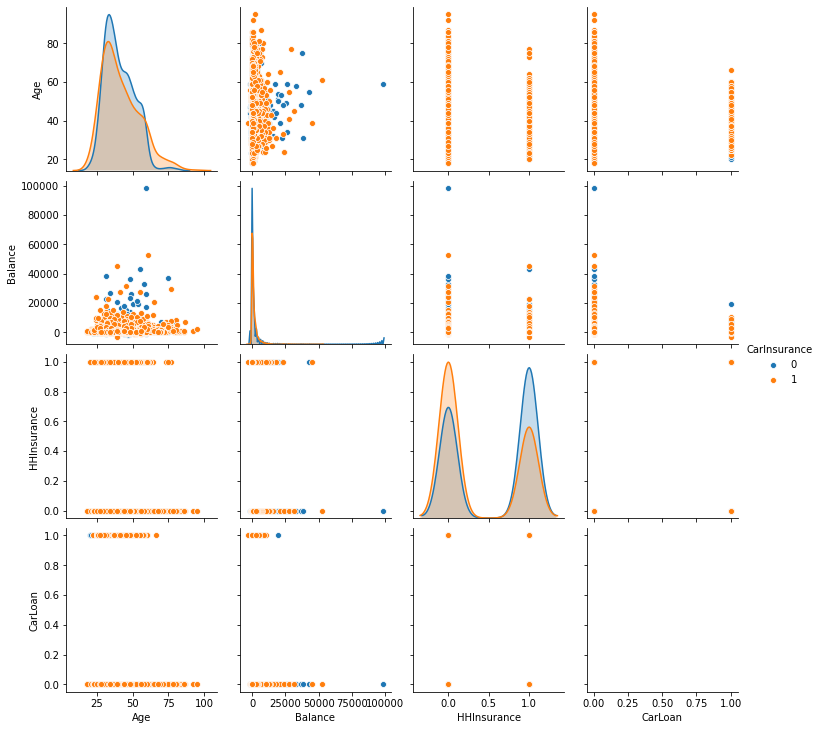

In [9]:
cols = ['CarInsurance','Age','Balance','HHInsurance','CarLoan']
sns.pairplot(insurance_data[cols],hue='CarInsurance')

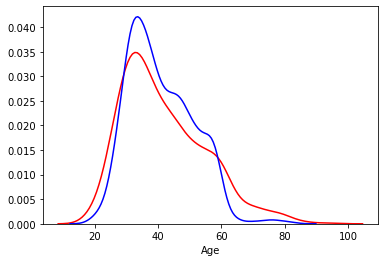

In [10]:
sns.distplot(insurance_data['Age'][insurance_data['CarInsurance']==1],hist=False,color='red')
sns.distplot(insurance_data['Age'][insurance_data['CarInsurance']==0],hist=False,color='blue')

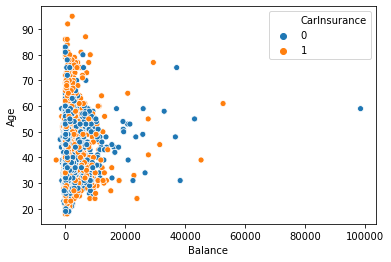

In [11]:
sns.scatterplot(hue='CarInsurance',y='Age',x='Balance',data=insurance_data)

In [12]:
insurance_data[insurance_data['Balance']>60000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [13]:
insurance_data.drop([1742],inplace=True)

### Handling missing values

In [14]:
merge_data = pd.concat([insurance_data,insurance_test],keys=('train','test'))

In [15]:
merge_data

Id  Age          Job  Marital  Education  Default  Balance  \
train 0       1   32   management   single   tertiary        0     1218   
      1       2   32  blue-collar  married    primary        0     1156   
      2       3   29   management   single   tertiary        0      637   
      3       4   25      student   single    primary        0      373   
      4       5   30   management  married   tertiary        0     2694   
...         ...  ...          ...      ...        ...      ...      ...   
test  995  4996   31       admin.   single  secondary        0      131   
      996  4997   52   management  married   tertiary        0     2635   
      997  4998   46   technician  married   tertiary        0     3009   
      998  4999   60      retired  married  secondary        0     7038   
      999  5000   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      2              1        0      cellular               3   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
...                ...      ...           ...             ...   
test  995            1        0      cellular              15   
      996            0        0      cellular               6   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                jan             2          -1             0      NaN   
      1                may             5          -1             0      NaN   
      2                jun             1         119             1  failure   
      3                may             2          -1             0      NaN   
      4                jun             1          -1             0      NaN   
...                    ...           ...         ...           ...      ...   
test  995              jun             1          -1             0      NaN   
      996              sep             1         108             8  success   
      997              aug             2          -1             0      NaN   
      998              oct             4          -1             0      NaN   
      999              may             2          -1             0      NaN   

          CallStart   CallEnd  CarInsurance  
train 0    13:45:20  13:46:30           0.0  
      1    14:49:03  14:52:08           0.0  
      2    16:30:24  16:36:04           1.0  
      3    12:06:43  12:20:22           1.0  
      4    14:35:44  14:38:56           0.0  
...             ...       ...           ...  
test  995  13:54:24  13:56:55           NaN  
      996  13:13:38  13:18:51           NaN  
      997  10:23:35  10:24:33           NaN  
      998  17:01:49  17:04:07           NaN  
      999  12:15:19  12:30:34           NaN  

[4999 rows x 19 columns]

In [16]:
merge_data.drop(['Id'],axis=1,inplace=True)

In [17]:
merge_data.drop(['CallStart','CallEnd'],axis=1,inplace=True)

In [18]:
merge_data.isnull().sum()

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CarInsurance        1000
dtype: int64

In [19]:
merge_data_df = merge_data.copy()

In [20]:
merge_data_df[merge_data_df['Outcome'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.0,3798.0,3041.000000
mean,41.172722,0.016588,1414.180358,0.496051,0.140864,16.059768,2.798315,-1.0,0.0,0.343637
std,11.275358,0.127737,3032.231216,0.500050,0.347927,8.442643,3.292817,0.0,0.0,0.475000
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,0.000000,83.000000,0.000000,0.000000,8.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,0.000000,482.500000,0.000000,0.000000,16.500000,2.000000,-1.0,0.0,0.000000
75%,49.000000,0.000000,1505.500000,1.000000,0.000000,22.000000,3.000000,-1.0,0.0,1.000000
max,95.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,43.000000,-1.0,0.0,1.000000


In [21]:
merge_data_df['Outcome'].fillna('NoPrevContact',inplace=True)

In [22]:
merge_data_df['Outcome'].isnull().sum()

0

In [23]:
merge_data_df[merge_data_df['Communication'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,902.000000
mean,40.501336,0.018700,1165.617097,0.706144,0.143366,15.596616,2.688335,1.700801,0.020481,0.186253
std,9.502357,0.135523,2634.372948,0.455730,0.350602,8.496422,3.022335,39.179002,0.385255,0.389526
min,20.000000,0.000000,-1547.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,66.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,419.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1219.000000,1.000000,0.000000,23.000000,3.000000,-1.000000,0.000000,0.000000
max,61.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,41.000000,779.000000,12.000000,1.000000


In [24]:
merge_data_df['Communication'].value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [25]:
merge_data_df['Communication'].fillna('cellular',inplace=True)

In [26]:
merge_data_df['Communication'].isnull().sum()

0

In [27]:
merge_data_df[merge_data_df['Education'].isnull()]

Age          Job   Marital Education  Default  Balance  \
train 14    25     services    single       NaN        0     2022   
      27    45          NaN  divorced       NaN        0        0   
      50    54     services  divorced       NaN        0        0   
      53    78      retired   married       NaN        0     3208   
      58    34   management    single       NaN        0     6013   
...        ...          ...       ...       ...      ...      ...   
test  855   22      student    single       NaN        0     3317   
      867   77   management   married       NaN        0     1780   
      908   50  blue-collar   married       NaN        0     1537   
      972   62    housemaid   married       NaN        0     2021   
      984   35  blue-collar   married       NaN        0      568   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 14             0        0      cellular              29   
      27             0        0      cellular              21   
      50             1        0      cellular              16   
      53             0        0     telephone              20   
      58             1        0      cellular              18   
...                ...      ...           ...             ...   
test  855            0        0      cellular              10   
      867            1        0      cellular              23   
      908            0        0      cellular              17   
      972            0        0     telephone              26   
      984            1        0      cellular              14   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  \
train 14               jul             8          97            12   
      27               apr             3          -1             0   
      50               apr             1          -1             0   
      53               may             3          -1             0   
      58               may             1          -1             0   
...                    ...           ...         ...           ...   
test  855              aug             1          -1             0   
      867              oct             2         183             3   
      908              jun             6          -1             0   
      972              feb             1          -1             0   
      984              may             2         293             1   

                 Outcome  CarInsurance  
train 14           other           1.0  
      27   NoPrevContact           1.0  
      50   NoPrevContact           0.0  
      53   NoPrevContact           1.0  
      58   NoPrevContact           1.0  
...                  ...           ...  
test  855  NoPrevContact           NaN  
      867        success           NaN  
      908  NoPrevContact           NaN  
      972  NoPrevContact           NaN  
      984        failure           NaN  

[216 rows x 16 columns]

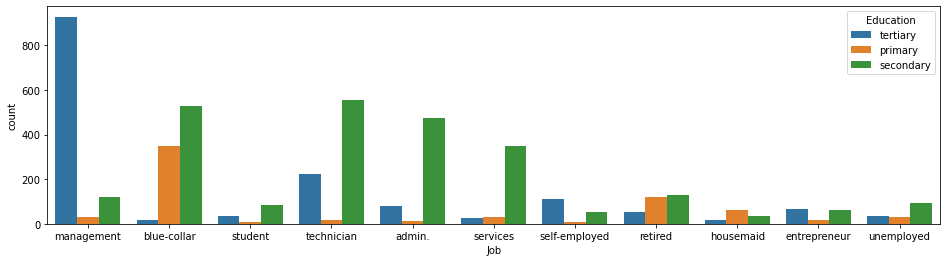

In [28]:
plt.figure(figsize=(16,4))
sns.countplot('Job',hue='Education',data=merge_data_df)

In [29]:
edu_map = merge_data_df.groupby('Job')['Education'].describe()['top']

In [30]:
edu_map

Job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
Name: top, dtype: object

In [31]:
merge_data_df['Education'].isnull().sum()

216

In [32]:
merge_data_df.shape

(4999, 16)

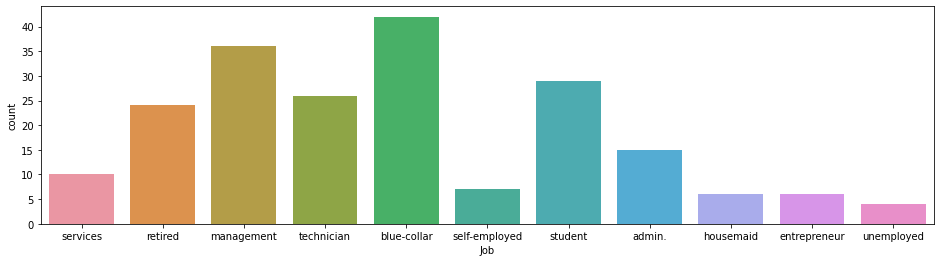

In [33]:
plt.figure(figsize=(16,4))
sns.countplot('Job',data=merge_data_df[merge_data_df['Education'].isnull()])

In [34]:
job_types = merge_data_df['Job'].value_counts().index

In [35]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [36]:
for j in job_types:
    merge_data_df.loc[(merge_data_df['Education'].isnull()) & (merge_data_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

In [37]:
merge_data_df['Education'].isnull().sum()
# To locate rows where job is null

11

In [38]:
merge_data_df[merge_data_df['Education'].isnull()]

Age  Job   Marital Education  Default  Balance  HHInsurance  \
train 27     45  NaN  divorced       NaN        0        0            0   
      239    41  NaN    single       NaN        0      942            0   
      1147   50  NaN   married       NaN        0      558            0   
      2032   44  NaN   married       NaN        0      722            1   
      2685   50  NaN   married       NaN        0     1533            0   
      2842   28  NaN    single       NaN        0      326            0   
      2941   78  NaN   married       NaN        0     2235            0   
      3615   39  NaN    single       NaN        0        0            0   
test  22     47  NaN   married       NaN        0      194            0   
      81     46  NaN   married       NaN        0     2367            0   
      318    65  NaN   married       NaN        0     4717            0   

            CarLoan Communication  LastContactDay LastContactMonth  \
train 27          0      cellular              21              apr   
      239         0      cellular              27              oct   
      1147        0      cellular               9              jul   
      2032        0     telephone              22              jul   
      2685        0      cellular               4              aug   
      2842        0      cellular              11              oct   
      2941        0     telephone              14              apr   
      3615        0     telephone              28              jan   
test  22          0      cellular               4              aug   
      81          0      cellular               6              jun   
      318         0     telephone               6              aug   

            NoOfContacts  DaysPassed  PrevAttempts        Outcome  \
train 27               3          -1             0  NoPrevContact   
      239              1         188             1        success   
      1147             1         683             6        failure   
      2032             2          -1             0  NoPrevContact   
      2685             1          -1             0  NoPrevContact   
      2842             1         231             1        success   
      2941             3          -1             0  NoPrevContact   
      3615             1          -1             0  NoPrevContact   
test  22               1          -1             0  NoPrevContact   
      81               3          -1             0  NoPrevContact   
      318              1          -1             0  NoPrevContact   

            CarInsurance  
train 27             1.0  
      239            1.0  
      1147           1.0  
      2032           0.0  
      2685           0.0  
      2842           1.0  
      2941           1.0  
      3615           0.0  
test  22             NaN  
      81             NaN  
      318            NaN

In [39]:
merge_data_df.isnull().sum()

Age                    0
Job                   24
Marital                0
Education             11
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome                0
CarInsurance        1000
dtype: int64

In [40]:
merge_data_df.dropna(inplace=True)

In [41]:
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
dtype: int64

### Seperate out the numerical data

In [42]:
numeric_cols = merge_data_df.select_dtypes(include=[np.number]).columns

In [43]:
numeric_cols

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance'],
      dtype='object')

In [44]:
merge_data_df_num = merge_data_df[numeric_cols]

In [45]:
categorical_cols = merge_data_df.select_dtypes(include=['object']).columns

In [46]:
categorical_cols

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

In [47]:
merge_data_df_cat = merge_data_df[categorical_cols]

In [48]:
merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)

In [49]:
insurance_data_combined = pd.concat([merge_data_df_num,merge_data_df_cat_dummies],axis=1)

In [50]:
insurance_data_combined.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  CarInsurance  ...  \
train 0             2          -1             0           0.0  ...   
      1             5          -1             0           0.0  ...   
      2             1         119             1           1.0  ...   
      3             2          -1             0           1.0  ...   
      4             1          -1             0           0.0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 0                      1                0              0   
      1                      1                0              0   
      2                      0                1              0   
      3                      1                0              0   
      4                      1                0              0   

         Outcome_success  
train 0                0  
      1                0  
      2                0  
      3                0  
      4                0  

[5 rows x 45 columns]

In [51]:
a = pd.IndexSlice

In [52]:
data = insurance_data_combined.loc[['train'],::]

In [53]:
data.shape

(3980, 45)

In [54]:
x = data.drop(columns='CarInsurance')

In [55]:
y = data['CarInsurance']

In [56]:
x.shape

(3980, 44)

In [57]:
y.shape

(3980,)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, random_state = 100)

# Using Logistic Regression for predictions

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Sharad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = lr.predict(x_test)

In [61]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test,y_pred)

array([[601,  82],
       [351, 160]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [65]:
accuracy

0.6373534338358459

In [66]:
from sklearn.metrics import precision_score  ##[TP / (TP + FP)]
from sklearn.metrics import recall_score   ##[TP / (TP + FN)]
from sklearn.metrics import f1_score   ##[2*Precision*Recall / (Precision + Recall)]

In [67]:
precision_score(y_test, y_pred)
# Measures the ability of the classifier not to label as positive a sample that is negative.

0.6611570247933884

In [68]:
recall_score(y_test, y_pred)
# Measures the proportion of positives that are correctly predicted

0.3131115459882583

In [69]:
f1_score(y_test, y_pred)

0.4249667994687915

# Roc curve

Plot of true positive rate against false positive rate at various threshold settings

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
roc_auc = roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

In [72]:
roc_auc

0.6872695286421995

# Plotting the ROC curve

In [73]:
from sklearn.metrics import roc_curve

In [74]:
fpr, tpr, thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1])

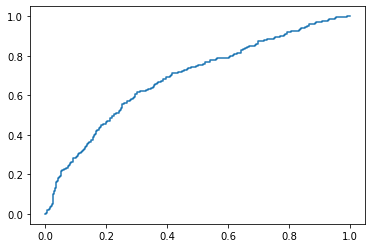

In [75]:
plt.plot(fpr,tpr)

The ideal curve should lean more close on y axis at the starting and more high afterwards on x axis

In [76]:
y_pred = lr.predict(x_test)
y_pred
# This is known as hard prediction where prediction is either 0 or 1

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
# This is known as soft prediction where exact probability of positive class is shown
lr.predict_proba(x_test)[:,1]

array([0.38543556, 0.35691897, 0.05587455, ..., 0.24932891, 0.28512723,
       0.26481539])

In [78]:
# Changing the threshold value
# threshold is the value, according to which machine will make hard predictions, below the threshold 0 and above threshold it will take as 1
threshold = 0.6
y_pred = (lr.predict_proba(x_test)[:,1]>threshold).astype(int)
y_pred
# Here, we are calling hard predictions after changing the threshold 

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
confusion_matrix(y_pred,y_test)

array([[648, 407],
       [ 35, 104]], dtype=int64)

In [80]:
accuracy_score(y_test, y_pred)

0.6298157453936348

In [81]:
fpr, tpr, thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1])

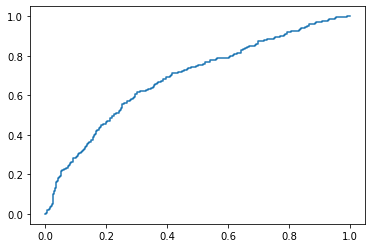

In [82]:
plt.plot(fpr,tpr)
# ROC curve is usually plotted on the basis of hard predictions
# Roc curve wont be changed if we cahnge the thresholds because the curve has been plotted on the basis of various thresholds
# Roc curve will change if we plot the curve on soft predictions